Exercise 3-1.
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample. 


Download thinkstats base and import nsfg data:

In [200]:
#Turn off panda 3.0 future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [202]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [204]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [206]:
import nsfg

resp = nsfg.ReadFemResp()


Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

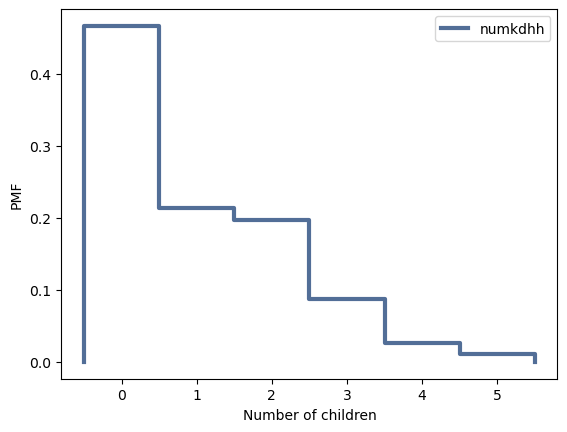

In [208]:
import thinkstats2
import thinkplot

pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")


Biased distribution

In [210]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

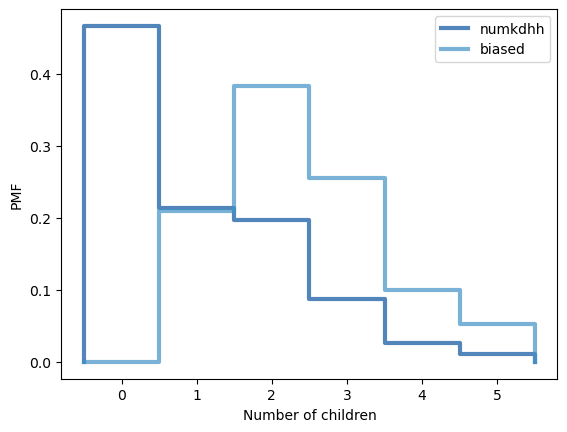

In [211]:
biased = BiasPmf(pmf, label="biased")

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")


Compute means

In [213]:
#Actual:

pmf.Mean() 

1.024205155043831

In [214]:
#Biased

biased.Mean()

2.403679100664282

Exercise 3-2.
 
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [216]:
#pmf mean

def PmfMean(pmf):
    mean = sum(value * prob for value, prob in pmf.Items()) 
    return mean

In [217]:
#pmf variance

def PmfVar(pmf):
    mean = PmfMean(pmf)  # Compute the mean first
    variance = sum(prob * (value - mean) ** 2 for value, prob in pmf.Items())
    return variance

Testing

In [219]:
from thinkstats2 import Pmf

# Define a PMF where probabilities sum to 1
pmf = Pmf({1: 0.1, 2: 0.3, 3: 0.4, 4: 0.2})  # Probabilities add to 1

# Calculate mean and variance using custom and built-in methods
mean_custom = PmfMean(pmf)
var_custom = PmfVar(pmf)

mean_builtin = pmf.Mean()
var_builtin = pmf.Var()

# Print results
print(f"Custom Mean: {mean_custom}, Built-in Mean: {mean_builtin}")
print(f"Custom Variance: {var_custom}, Built-in Variance: {var_builtin}")

Custom Mean: 2.7, Built-in Mean: 2.7
Custom Variance: 0.81, Built-in Variance: 0.81


Excercise 4.1

Exercise: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [222]:
#Import nsfg data 

import numpy as np
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Download necessary files
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

import nsfg


# Load and preprocess NSFG data
preg = nsfg.ReadFemPreg()

#Percentile calculation
cdf = thinkstats2.Cdf(preg.totalwgt_lb, label="Birth Weight")
percentile_rank = cdf.PercentileRank(6.2)  

print(f"The percentile rank for 6.2 lbs is {percentile_rank}%.")


The percentile rank for 6.2 lbs is 18.079221066607655%.


Exercise 4.2

The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

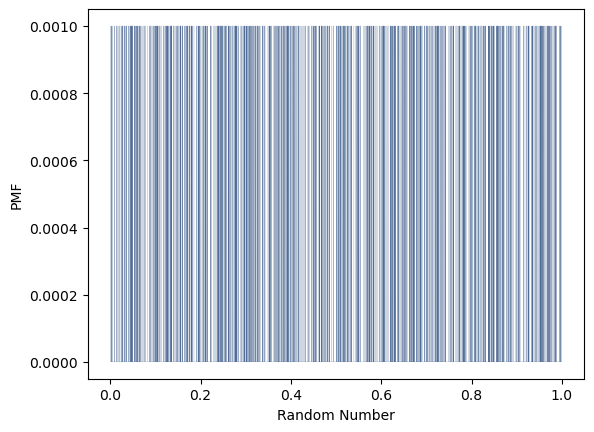

In [225]:
import numpy as np
import thinkstats2
import thinkplot

random_numbers = np.random.random(1000)
pmf = thinkstats2.Pmf(random_numbers)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel="Random Number", ylabel="PMF")

A PMF is designed for discrete values, but the random numbers generated using np.random.random are continuous, resulting in many unique values, which creates a dense and unreadable plot.

Now plot the CDF. Is the distribution uniform?

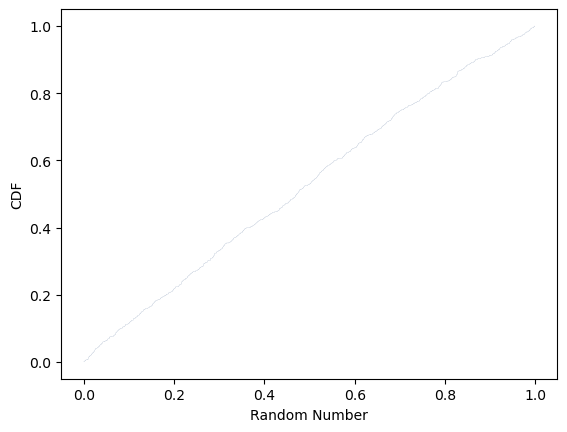

In [228]:
import numpy as np
import thinkstats2
import thinkplot

random_numbers = np.random.random(1000)
cdf = thinkstats2.Cdf(random_numbers)
thinkplot.Cdf(cdf, linewidth=0.1)
thinkplot.Config(xlabel="Random Number", ylabel="CDF")

The CDF is approximately a straight line, wich means that the distribution is uniform.